In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('../Data/dementia_dataset.csv') 

In [3]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
df.tail()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


In [5]:
df.drop(columns = ['Subject ID', 'MRI ID'], axis = 1, inplace = True)

In [6]:
df.shape

(373, 13)

This dataset contain 373 rows and 13 columns.

In [7]:
df.columns

Index(['Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [14]:
(df.isnull().sum() / df.shape[0]) * 100

Group       0.000000
Visit       0.000000
MR Delay    0.000000
M/F         0.000000
Hand        0.000000
Age         0.000000
EDUC        0.000000
SES         5.093834
MMSE        0.536193
CDR         0.000000
eTIV        0.000000
nWBV        0.000000
ASF         0.000000
dtype: float64

In [13]:
df[df.isnull().any(axis = 1)]

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1484,0.750,1.183


In [15]:
df.dtypes

Group        object
Visit         int64
MR Delay      int64
M/F          object
Hand         object
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
dtype: object

In [16]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print(f"All features : {all_col}\n")
print(f"Numeric features : {num_col}\n")
print(f"Categorical features : {cat_col}\n")

All features : ['Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

Numeric features : ['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

Categorical features : ['Hand', 'Group', 'M/F']



In [19]:
df.nunique()

Group         3
Visit         5
MR Delay    201
M/F           2
Hand          1
Age          39
EDUC         12
SES           5
MMSE         18
CDR           4
eTIV        286
nWBV        136
ASF         265
dtype: int64

In [32]:
for i in all_col:
    print(f"\n{i} column..")
    print(f"{df[i].value_counts(normalize = True) * 100} ")


Group column..
Nondemented    50.938338
Demented       39.142091
Converted       9.919571
Name: Group, dtype: float64 

Visit column..
1    40.214477
2    38.605898
3    15.549598
4     4.021448
5     1.608579
Name: Visit, dtype: float64 

MR Delay column..
0       40.214477
580      0.804290
1631     0.536193
647      0.536193
842      0.536193
          ...    
490      0.268097
830      0.268097
1282     0.268097
497      0.268097
1608     0.268097
Name: MR Delay, Length: 201, dtype: float64 

M/F column..
F    57.104558
M    42.895442
Name: M/F, dtype: float64 

Hand column..
R    100.0
Name: Hand, dtype: float64 

Age column..
73    6.970509
75    5.898123
78    5.630027
80    5.361930
81    4.825737
71    4.825737
82    4.557641
76    4.289544
77    4.289544
68    3.753351
84    3.485255
69    3.485255
83    3.217158
70    3.217158
74    3.217158
72    2.949062
79    2.949062
66    2.680965
88    2.680965
86    2.680965
85    2.412869
89    1.876676
65    1.608579
67    1.608579

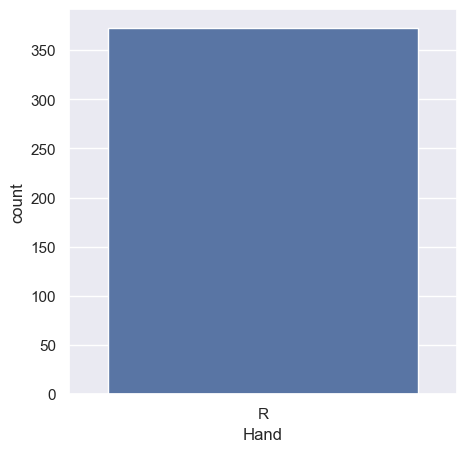

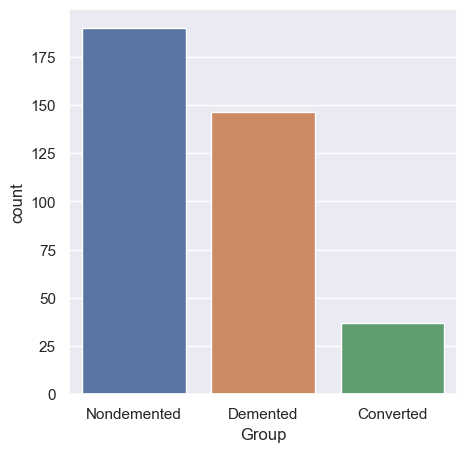

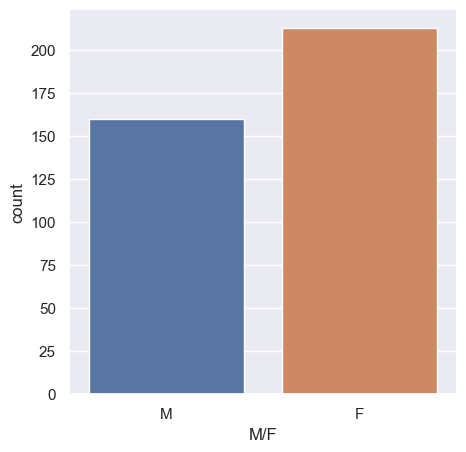

In [35]:
for i in cat_col:
    sns.set()
    plt.figure(figsize = (5, 5))
    sns.countplot(data = df, x = i)
    plt.show()

In [37]:
# 'Hand' column contain only value then drop this column.
df.drop(columns = ['Hand'], axis = 1, inplace = True)

In [42]:
print(f"Now dataframe has : {df.shape}")
df.head()

Now dataframe has : (373, 12)


,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [43]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print(f"All features : {all_col}\n")
print(f"Numeric features : {num_col}\n")
print(f"Categorical features : {cat_col}\n")

All features : ['Group', 'Visit', 'MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

Numeric features : ['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

Categorical features : ['Group', 'M/F']



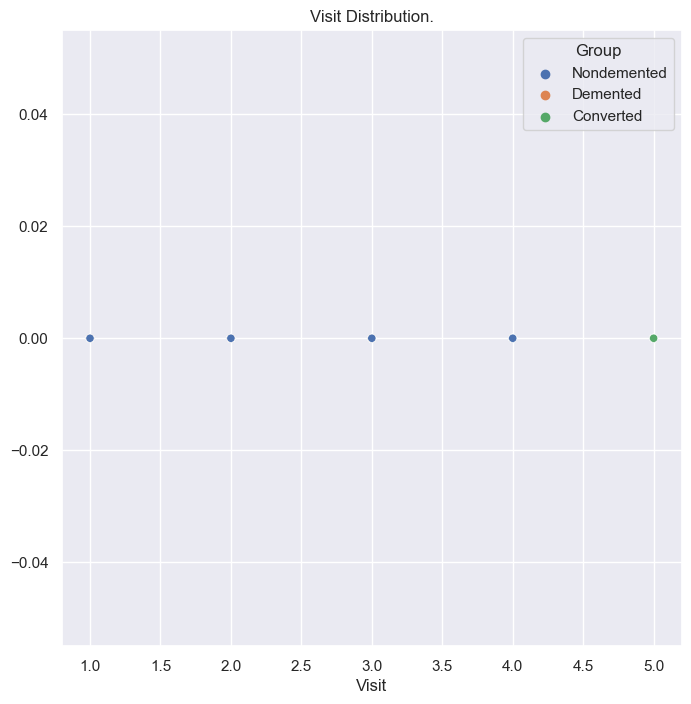

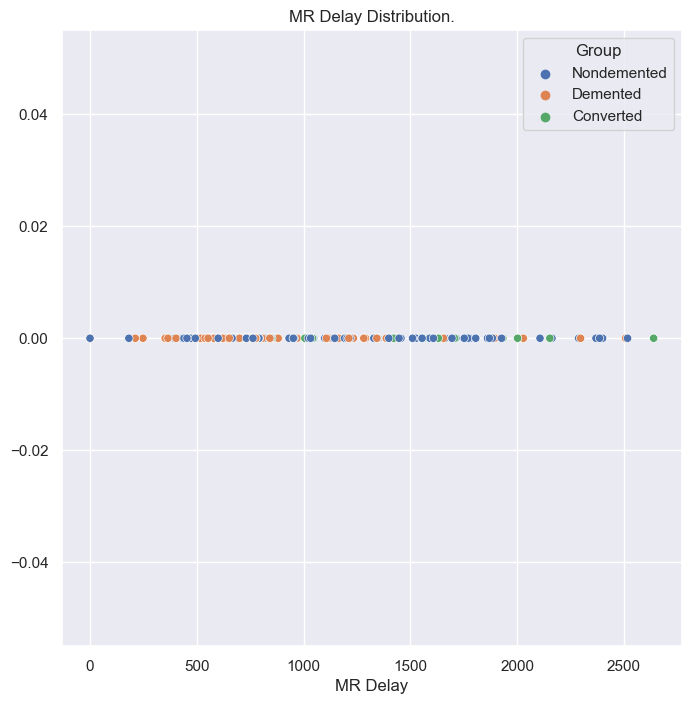

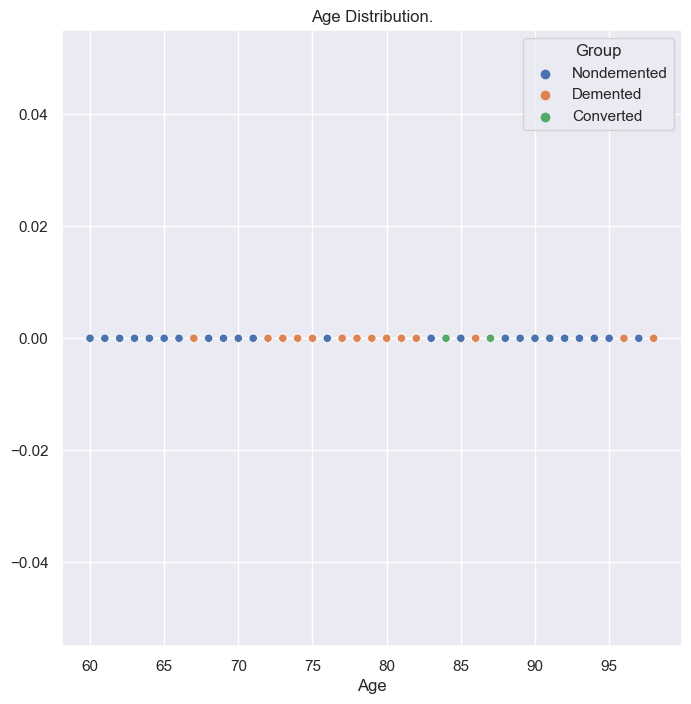

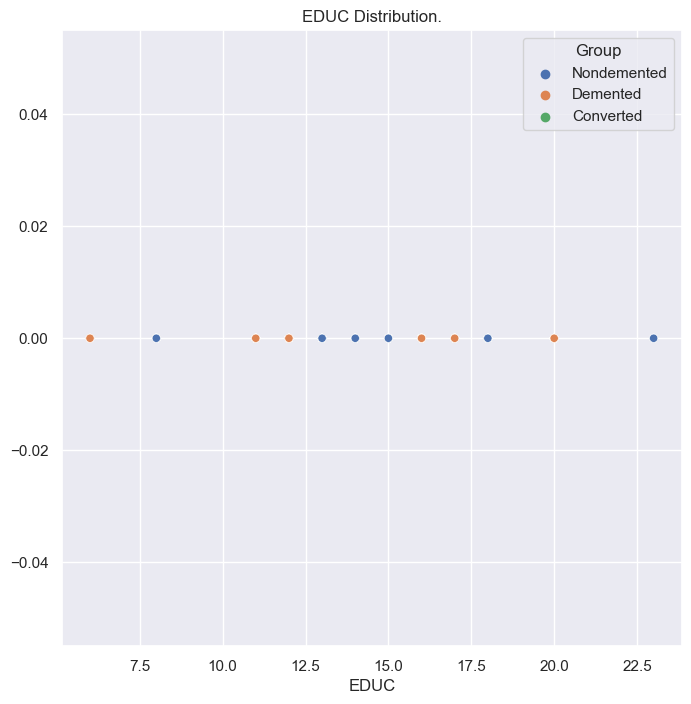

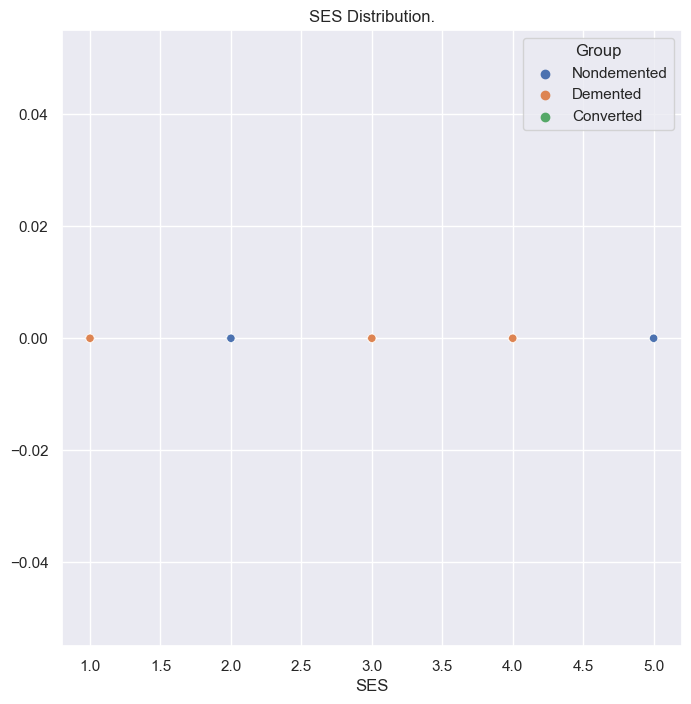

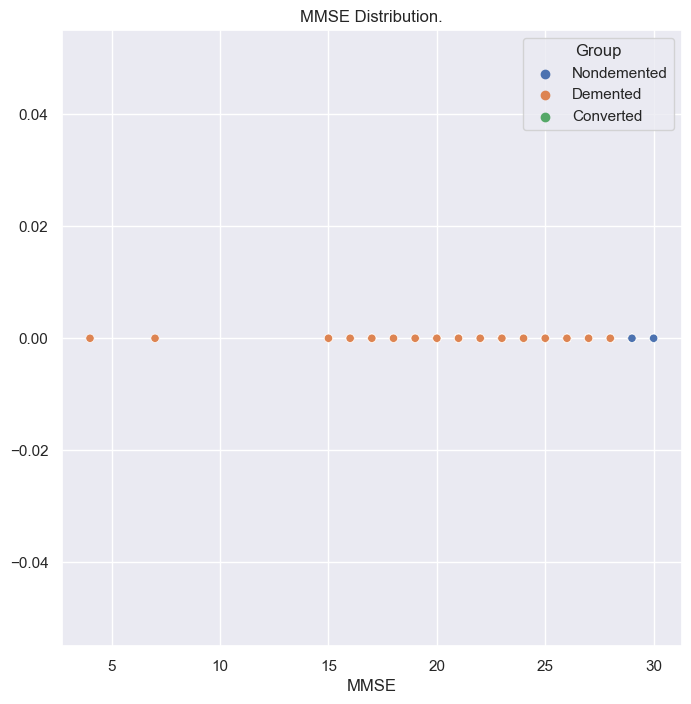

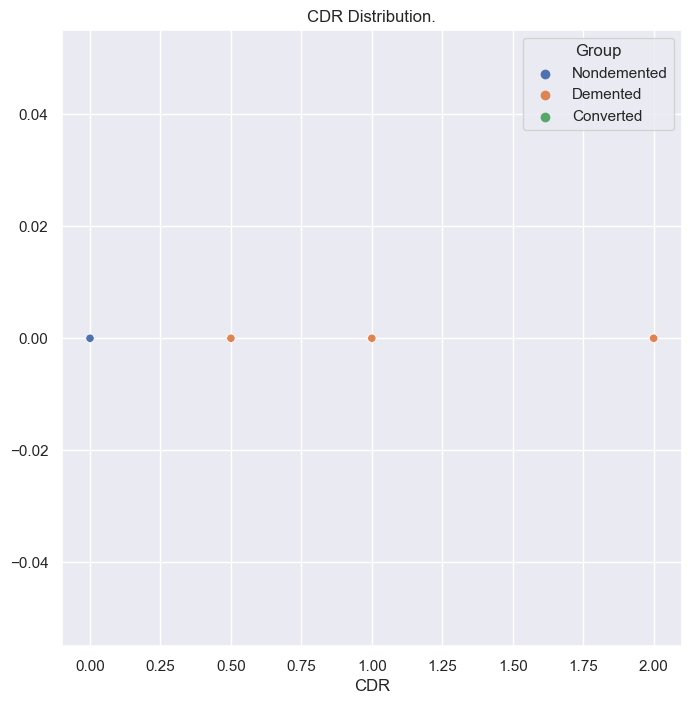

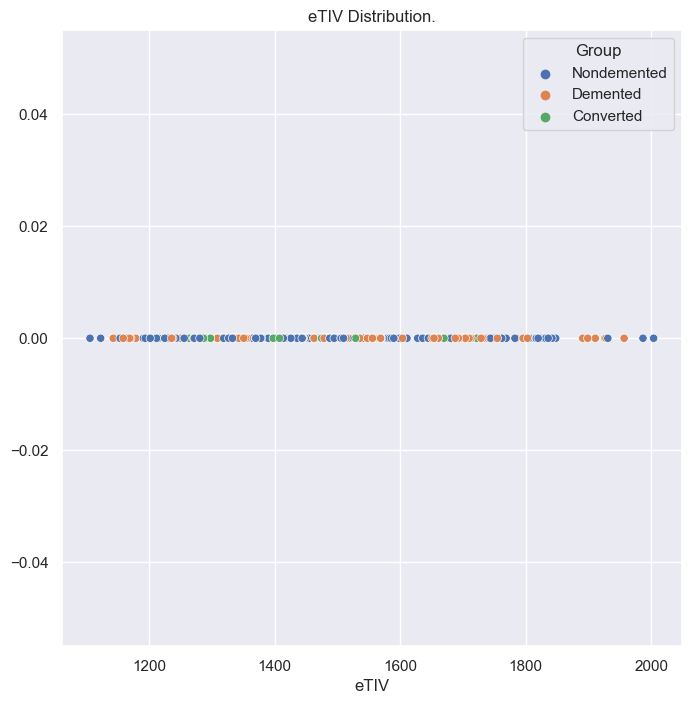

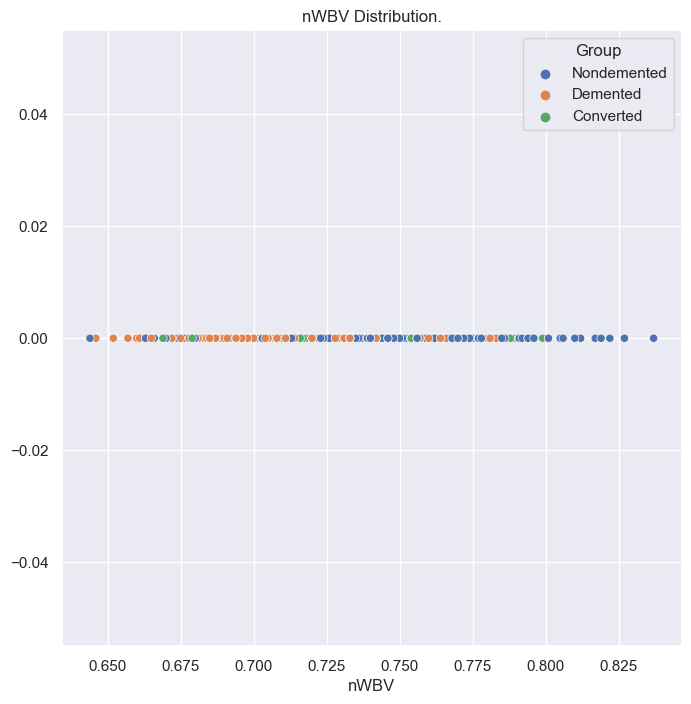

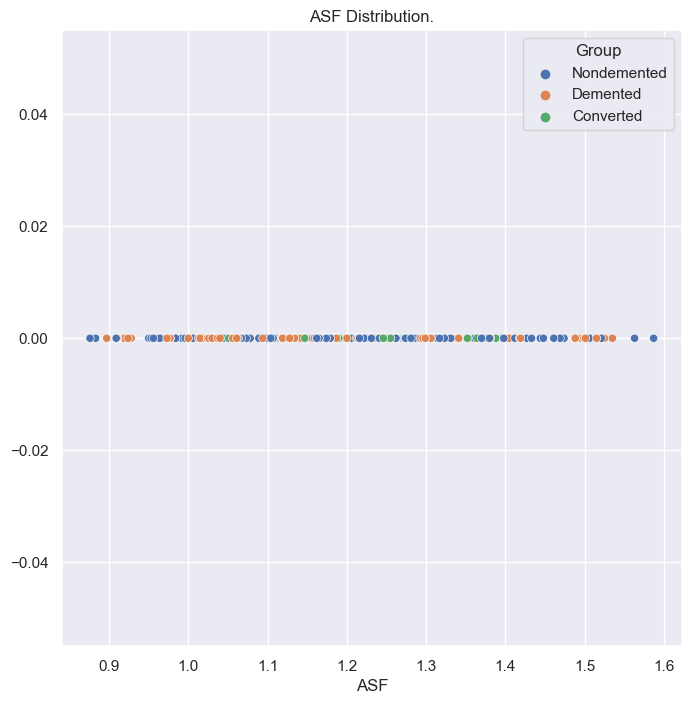

In [27]:
for i in num_col:
    sns.set()
    plt.figure(figsize = (8, 8))
    sns.scatterplot(data = df, x = i, y = np.zeros_like(a = len(df.index)), hue = 'Group')
    plt.title(f"{i} Distribution.")
    plt.show()

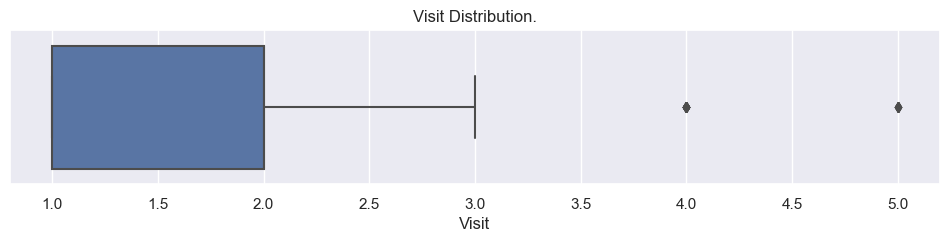

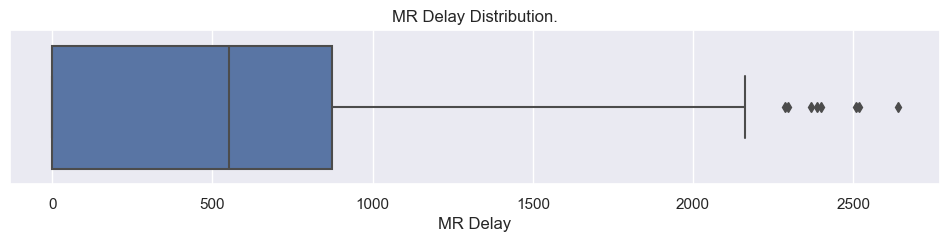

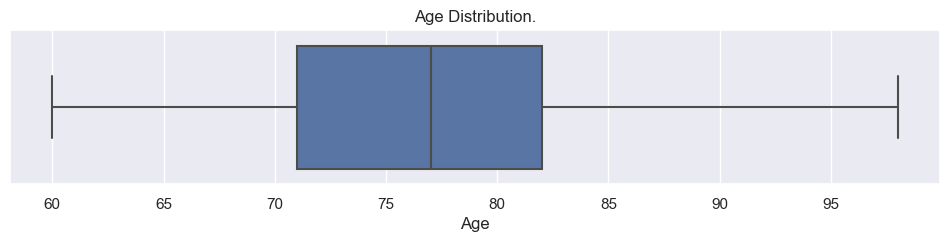

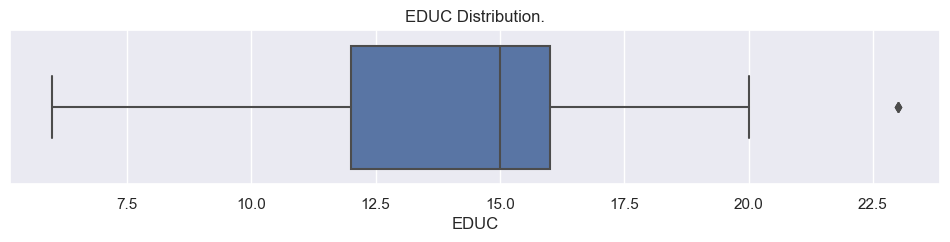

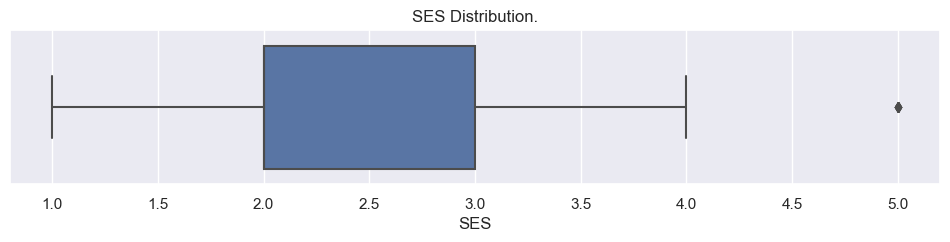

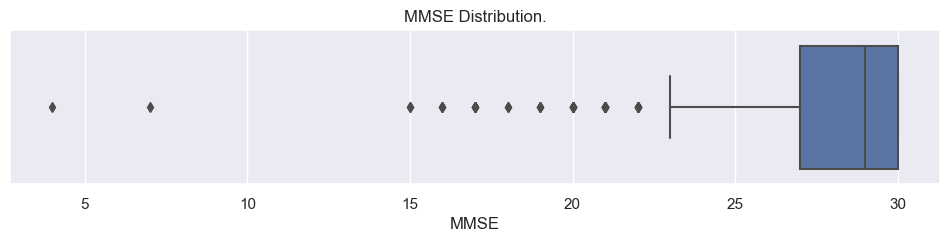

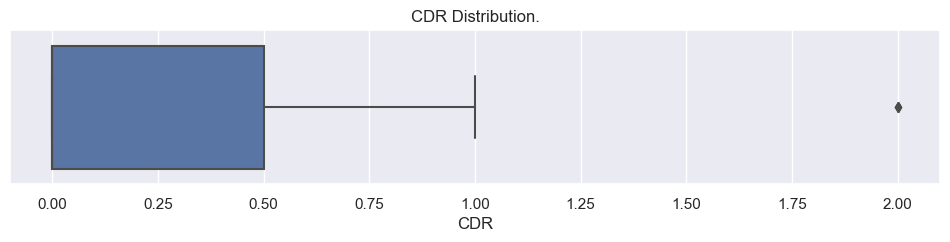

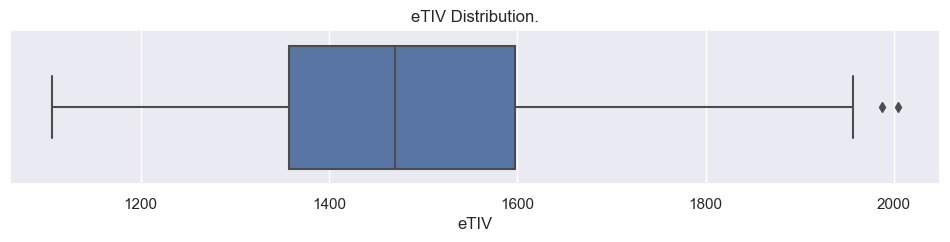

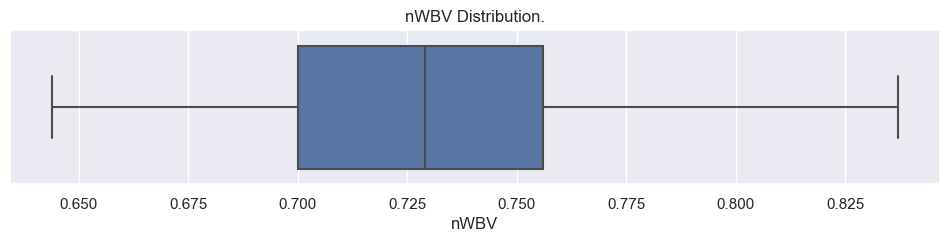

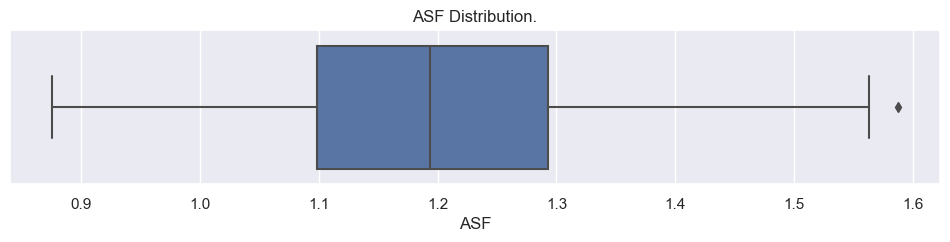

In [49]:
for i in num_col:
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(data = df, x = i,)
    plt.title(f"{i} Distribution.")
    plt.show()

As we can see from the above graphs, There are outliers present in some of the features

We can treat the outliers based on IQR

In [50]:
for i in num_col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
    
    df.loc[(df[i] > upper), i] = upper
    df.loc[(df[i] < lower), i] = lower

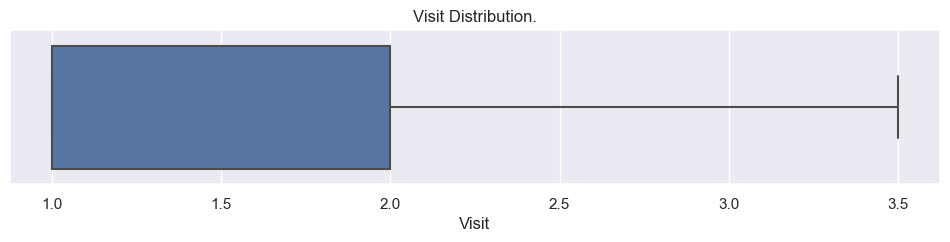

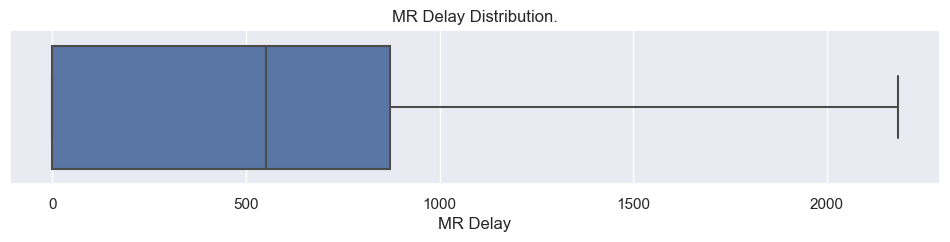

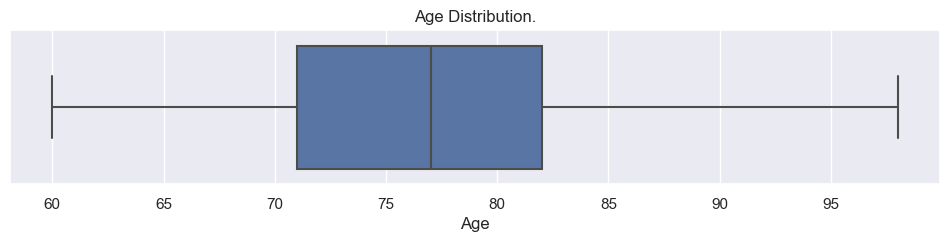

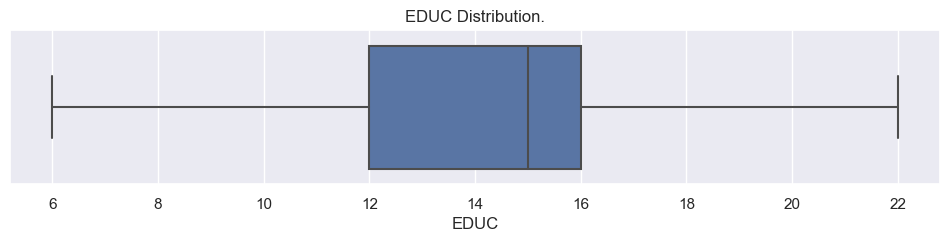

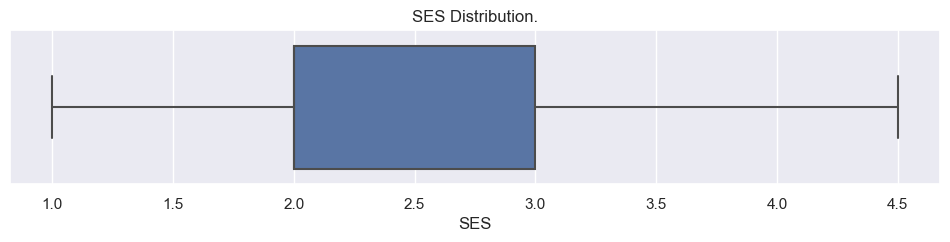

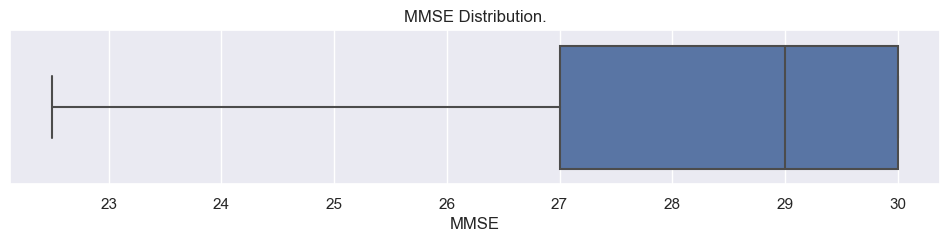

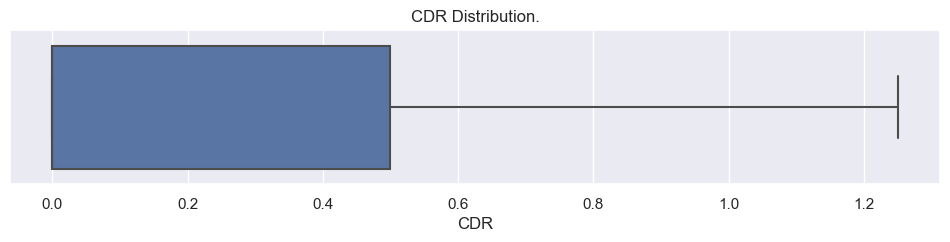

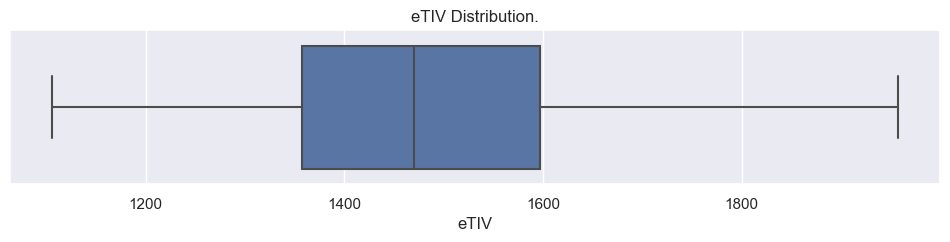

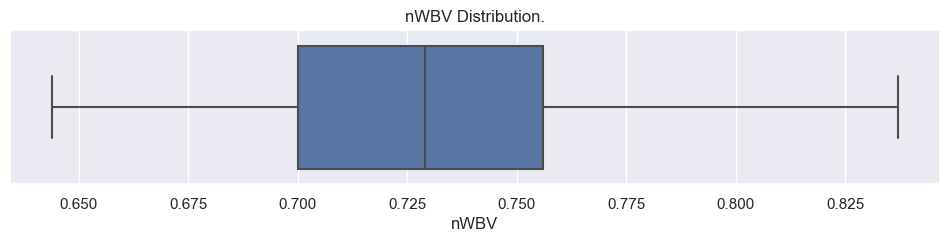

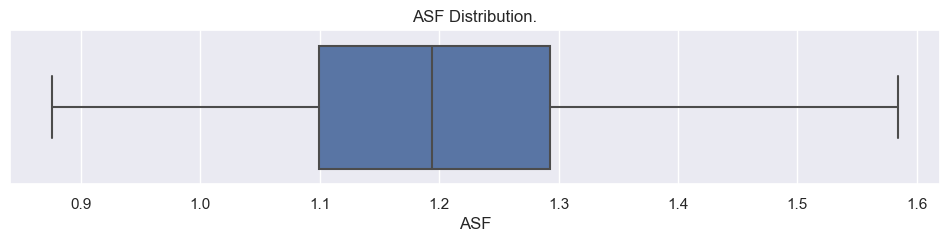

In [51]:
for i in num_col:
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(data = df, x = i,)
    plt.title(f"{i} Distribution.")
    plt.show()

<Figure size 3000x3000 with 0 Axes>

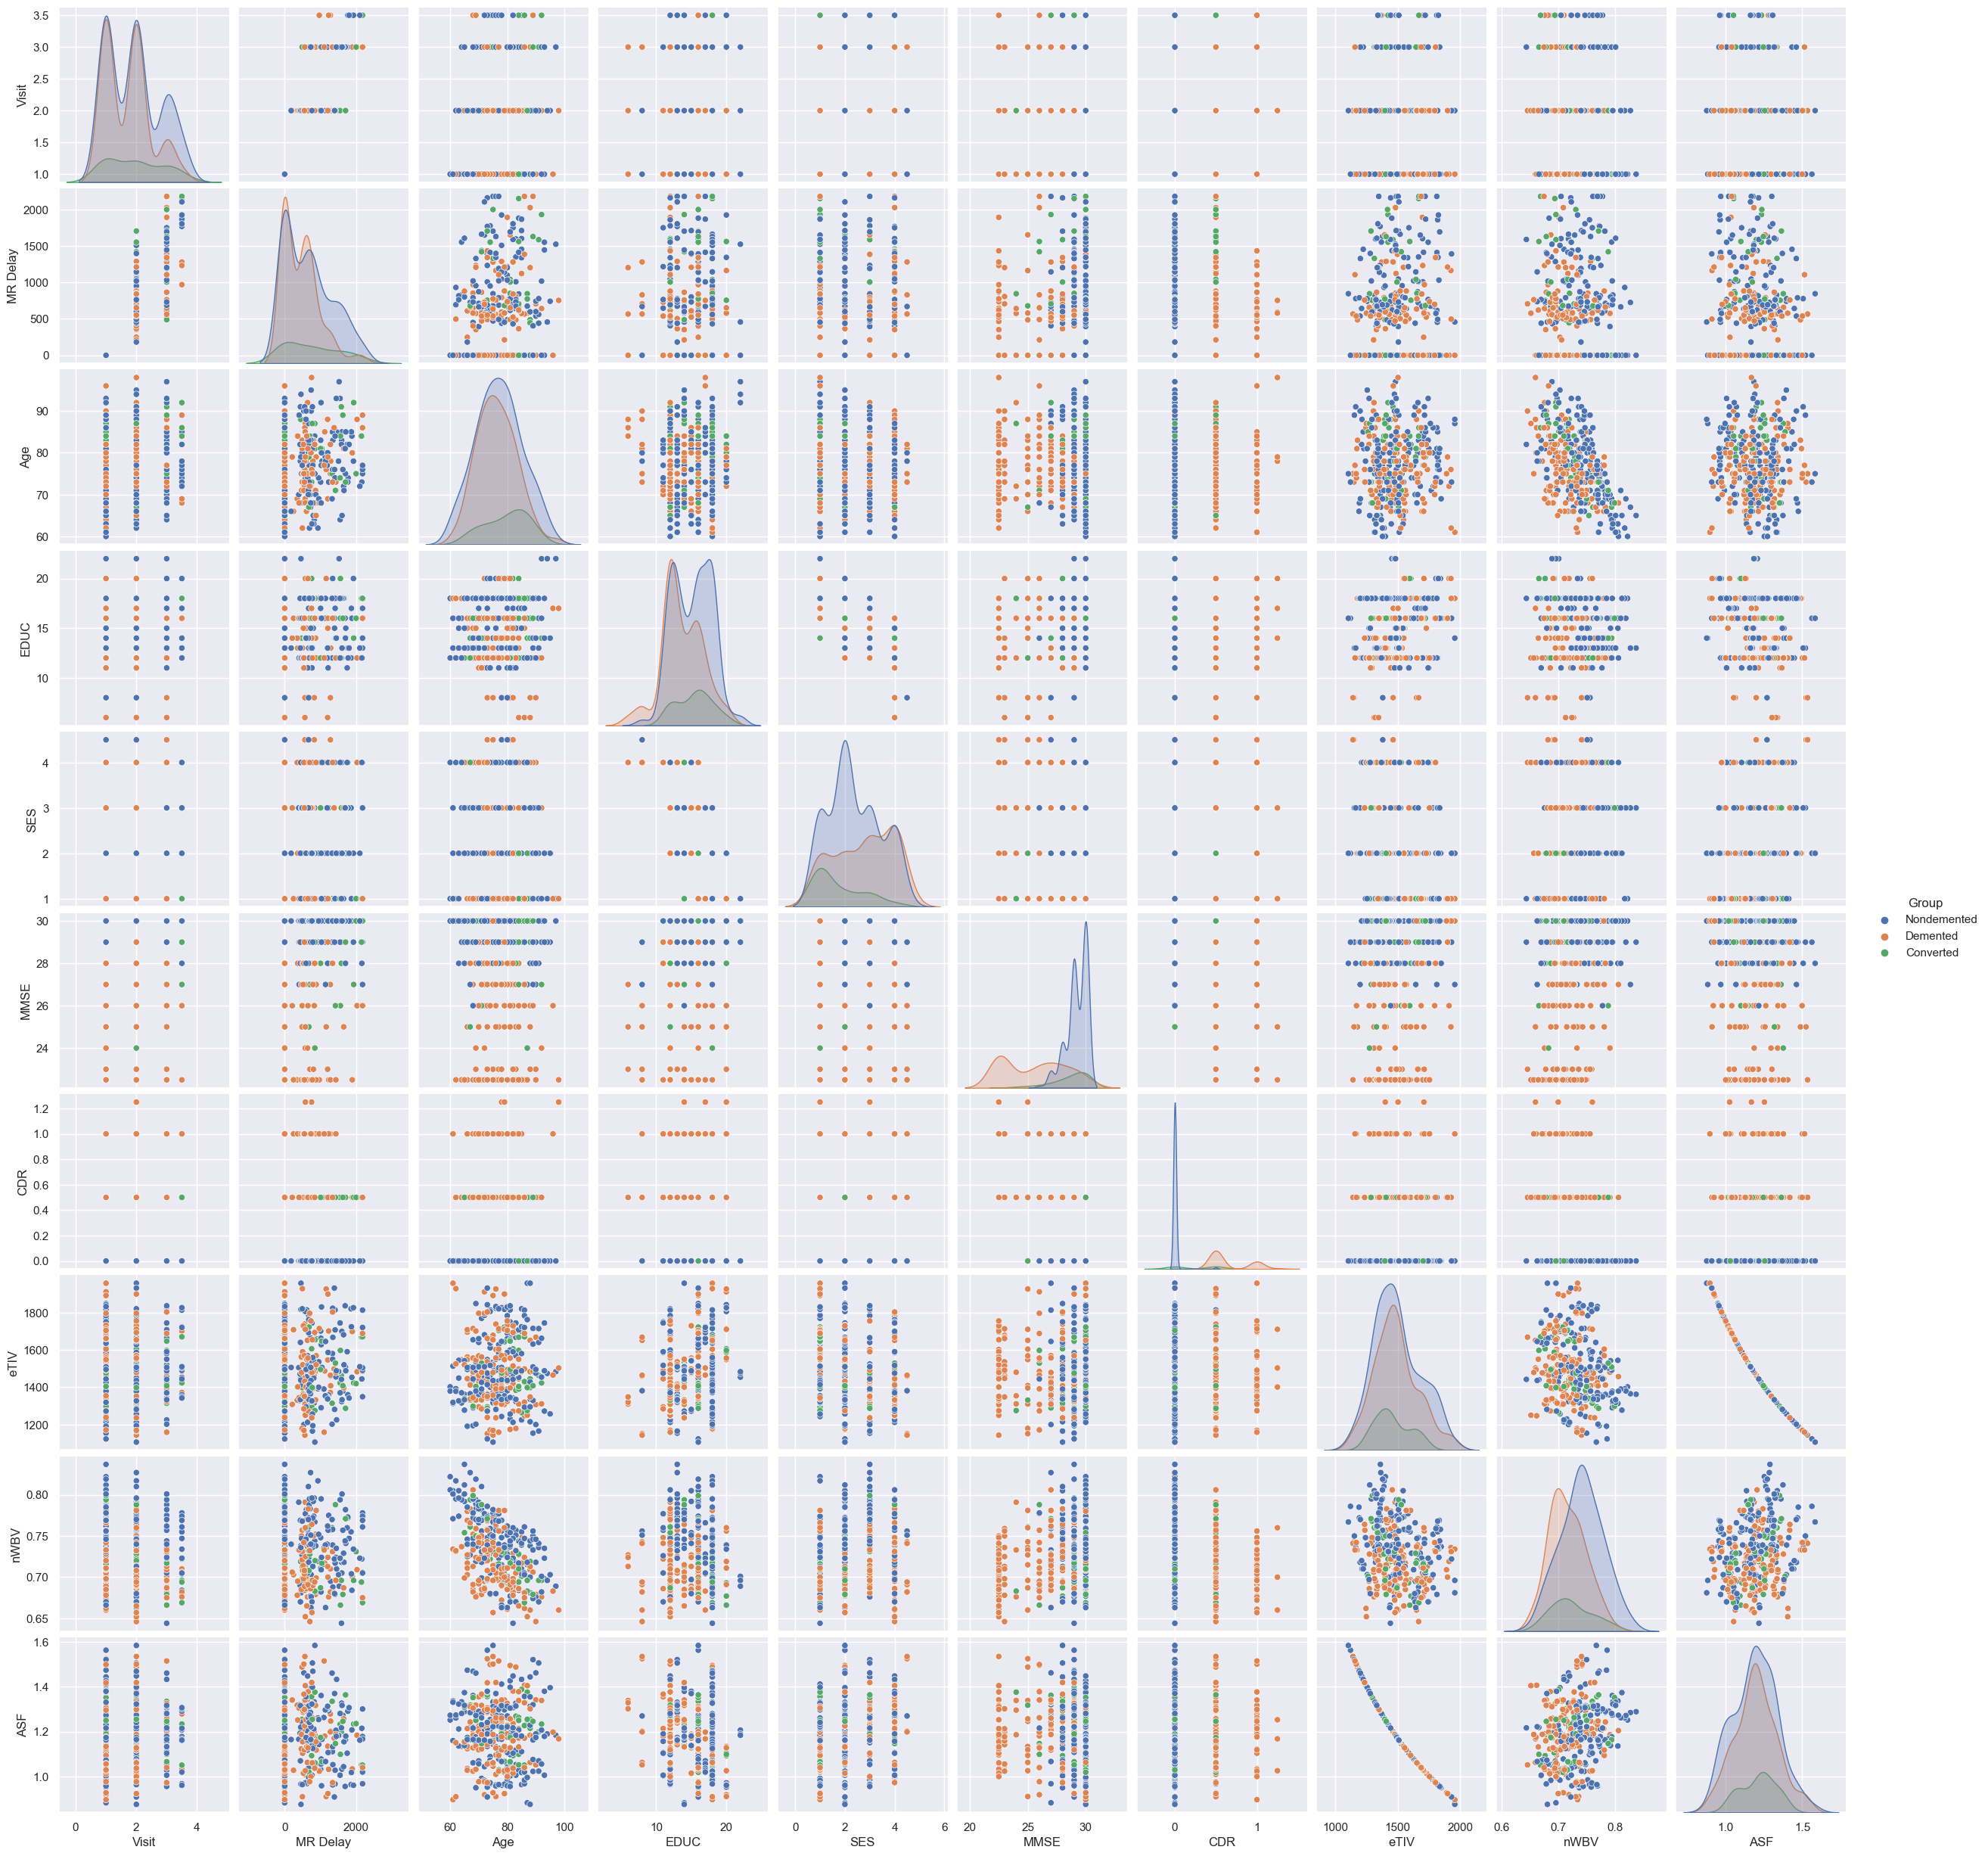

In [53]:
sns.set()
plt.figure(figsize = (30, 30))
sns.pairplot(data = df, hue = 'Group')
plt.show()